In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers
from keras import applications
from keras.layers import Input, BatchNormalization, Add
from keras import initializers, optimizers
from keras.models import Model, Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.core import Reshape, Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, Conv2DTranspose, MaxPooling2D, ZeroPadding2D, Cropping2D


Using TensorFlow backend.


In [3]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Image Colouring/Places_256/')
train_x = np.load('train_x.npy')
train_y = np.load('train_y.npy')
print(train_x.shape)
print(train_y.shape)

(4596, 256, 256, 1)
(4596, 256, 256, 3)


In [0]:
from sklearn.utils import shuffle
train_x, train_y = shuffle(train_x, train_y, random_state=0)

In [0]:
def normalize(data):
    data = (data.astype(np.float32) - 127.5)/127.5
    return data

train_x = normalize(train_x)
train_y = normalize(train_y)


In [7]:
def build_model():

    height, width = 256, 256
    X0 = Input(shape=(height, width, 1))
        
    X1 = Conv2D(64, kernel_size = (3, 3), strides = (2, 2), padding = 'same', name='g1')(X0)
    X1 = LeakyReLU(0.2)(X1)
    X1 = BatchNormalization()(X1)    
    X1 = Dropout(0.3)(X1)
    #X1 = (128, 128, 64)
    
    X2 = Conv2D(64, kernel_size = (3, 3), strides = (2, 2), padding = 'same', name='g2')(X1)
    X2 = LeakyReLU(0.2)(X2)
    X2 = BatchNormalization()(X2)    
    X2 = Dropout(0.3)(X2)
    #X2 = (64, 64, 64)
    
    X3 = Conv2D(128, kernel_size = (3, 3), strides = (2, 2), padding = 'same', name='g3')(X2)
    X3 = LeakyReLU(0.2)(X3)
    X3 = BatchNormalization()(X3)   
    X3 = Dropout(0.3)(X3)
    #X3 = (32, 32, 128)
    
    X4 = Conv2D(256, kernel_size = (3, 3), strides = (2, 2), padding = 'same', name='g4')(X3)
    X4 = LeakyReLU(0.2)(X4)
    X4 = BatchNormalization()(X4)
    X4 = Dropout(0.3)(X4)
    #X4 = (16, 16, 256)
    
    X5 = Conv2D(256, kernel_size = (3, 3), strides = (2, 2), padding = 'same', name='g5')(X4)
    X5 = LeakyReLU(0.2)(X5)
    X5 = BatchNormalization()(X5)
    X5 = Dropout(0.3)(X5)
    #X5 = (8, 8, 256)
    
    X6 = Conv2D(512, kernel_size = (3, 3), strides = (2, 2), padding = 'same', name='g6')(X5)
    X6 = LeakyReLU(0.2)(X6)
    X6 = BatchNormalization()(X6)
    X6 = Dropout(0.3)(X6)
    #X6 = (4, 4, 512)    
    
    X7 = Conv2D(512, kernel_size = (3, 3), strides = (2, 2), padding = 'same', name='g7')(X6)
    X7 = LeakyReLU(0.2)(X7)
    X7 = BatchNormalization()(X7)
    X7 = Dropout(0.3)(X7)
    #X7 = (2, 2, 512)    
    
    X_middle = Conv2DTranspose(512, kernel_size = (3, 3), strides = (1, 1), padding = 'same', name='g_middle')(X7)
    X_middle = LeakyReLU(0.2)(X_middle)
    X_middle = BatchNormalization()(X_middle)
    #X_middle = (2, 2, 512)
    
    
    X8 = Add()([X7, X_middle])
    X8 = Conv2DTranspose(512, kernel_size = (3, 3), strides = (2, 2), padding = 'same', name='g8')(X8)    
    X8 = LeakyReLU(0.2)(X8)
    X8 = BatchNormalization()(X8)
    #X8 = (4, 4, 512)
    
    X9 = Add()([X8, X6])
    X9 = Conv2DTranspose(256, kernel_size = (3, 3), strides = (2, 2), padding = 'same', name='g9')(X9)    
    X9 = LeakyReLU(0.2)(X9)
    X9 = BatchNormalization()(X9)    
    #X9 = (8, 8, 256)
    
    X10 = Add()([X5, X9])
    X10 = Conv2DTranspose(256, kernel_size = (3, 3), strides = (2, 2), padding = 'same', name='g10')(X10)    
    X10 = LeakyReLU(0.2)(X10)
    X10 = BatchNormalization()(X10)    
    #X10 = (16, 16, 256)
    
    X11 = Add()([X10, X4])
    X11 = Conv2DTranspose(128, kernel_size = (3, 3), strides = (2, 2), padding = 'same', name='g11')(X11)
    X11 = LeakyReLU(0.2)(X11)
    X11 = BatchNormalization()(X11)
    #X11 = (32, 32, 128)
    
    X12 = Add()([X11, X3])
    X12 = Conv2DTranspose(64, kernel_size = (3, 3), strides = (2, 2), padding = 'same', name='g12')(X12)
    X12 = LeakyReLU(0.2)(X12)
    X12 = BatchNormalization()(X12)
    #X12 = (64, 64, 64)
    
    X13 = Add()([X12, X2])
    X13 = Conv2DTranspose(64, kernel_size=(3, 3), strides = (2, 2), padding = 'same', name='g13')(X13)
    X13 = LeakyReLU(0.2)(X13)
    X13 = BatchNormalization()(X13)
    #X13 = (128, 128, 64)
    
    X14 = Add()([X13, X1])
    X14 = Conv2DTranspose(64, kernel_size=(3, 3), strides=(2, 2), padding='same', name='g14')(X14)
    X14 = LeakyReLU(0.2)(X14)
    X14 = BatchNormalization()(X14)
    #X14 = (256, 256, 64)
    
    X15 = Conv2D(3, kernel_size=(1, 1), strides = (1, 1), padding = 'same', activation = 'tanh', name='g15')(X14)
    
    
    model = Model(inputs = X0, outputs = X15)
    optimizer = optimizers.Adam(lr=1e-2, beta_1=0.5)
    model.compile(loss = 'logcosh', optimizer = optimizer,
              metrics = ['accuracy'])
    
    print(X1.shape)
    print(X2.shape)
    print(X3.shape)
    print(X4.shape)
    print(X5.shape)
    print(X6.shape)
    print(X7.shape)
    print(X_middle.shape)    
    print(X8.shape)
    print(X9.shape)
    print(X10.shape)
    print(X11.shape)
    print(X12.shape)
    print(X13.shape)
    print(X14.shape)
    print(X15.shape)

    return model

model = build_model()


(?, 128, 128, 64)
(?, 64, 64, 64)
(?, 32, 32, 128)
(?, 16, 16, 256)
(?, 8, 8, 256)
(?, 4, 4, 512)
(?, 2, 2, 512)
(?, ?, ?, 512)
(?, ?, ?, 512)
(?, ?, ?, 256)
(?, ?, ?, 256)
(?, ?, ?, 128)
(?, ?, ?, 64)
(?, ?, ?, 64)
(?, ?, ?, 64)
(?, ?, ?, 3)


In [8]:
history = model.fit(train_x, train_y, batch_size=32, validation_split=0.25, epochs=25)

from keras.models import load_model
model.save('model.h5')    

Instructions for updating:
Use tf.cast instead.
Train on 3447 samples, validate on 1149 samples
Epoch 1/25
3447/3447 [==============================] - 55s 16ms/step - loss: 0.0311 - acc: 0.3560 - val_loss: 0.0218 - val_acc: 0.4455
Epoch 2/25
3447/3447 [==============================] - 47s 14ms/step - loss: 0.0198 - acc: 0.4084 - val_loss: 0.0447 - val_acc: 0.3475
Epoch 3/25
3447/3447 [==============================] - 46s 13ms/step - loss: 0.0180 - acc: 0.4482 - val_loss: 0.0397 - val_acc: 0.4405
Epoch 4/25
3447/3447 [==============================] - 47s 14ms/step - loss: 0.0173 - acc: 0.4689 - val_loss: 0.0285 - val_acc: 0.4329
Epoch 5/25
3447/3447 [==============================] - 46s 13ms/step - loss: 0.0172 - acc: 0.4766 - val_loss: 0.0176 - val_acc: 0.4471
Epoch 6/25
3447/3447 [==============================] - 46s 13ms/step - loss: 0.0163 - acc: 0.4855 - val_loss: 0.0204 - val_acc: 0.4730
Epoch 7/25
3447/3447 [==============================] - 46s 13ms/step - loss: 0.0156 - a

In [0]:
test_x = np.load('test_x.npy')
test_y = np.load('test_y.npy')

In [10]:
scores = model.evaluate(test_x, test_y)
print('%s: %.2f%%'% (model.metrics_names[1], scores[1]*100))

960/960 [==============================] - 5s 5ms/step
acc: 59.29%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


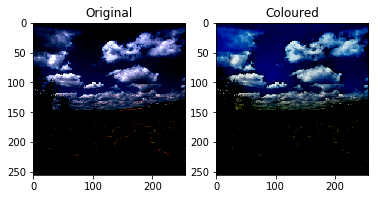

In [20]:
import matplotlib.pyplot as plt
i = np.random.randint(0, len(test_x))
temp = []
temp.append(test_x[i])
img_g = np.array(temp)
prediction = model.predict(img_g)
prediction = np.squeeze(prediction, axis=0)
f, a = plt.subplots(1, 2)
a[0].set_title('Original')
a[0].imshow(test_y[i])
a[1].set_title('Coloured')
a[1].imshow(prediction)
plt.show()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


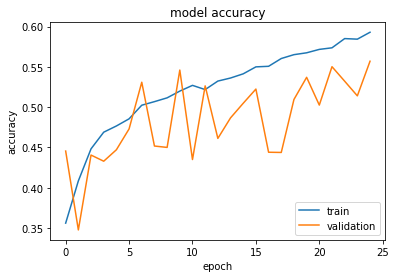

In [21]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

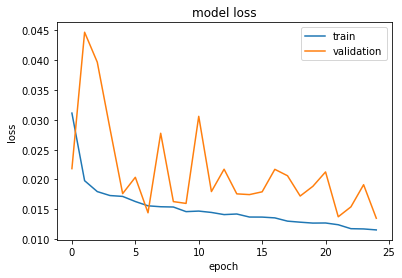

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()